<a href="https://colab.research.google.com/github/zachmakki15/IDS/blob/main/Project5_Problem2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Intro Data Science

Project #5

Problem #2

04/03/2022

#Problem 2 (Python Naive Bayes Model) 

##Import the Dataset

In [18]:
#Import the needed python libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Import the dataset in python
dataFrame = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          3345 non-null   object
 1   Alcohol_flag  3345 non-null   object
 2   Sugar_flag    3345 non-null   object
dtypes: object(3)
memory usage: 78.5+ KB


In [19]:
dataFrame.head()

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low


##Check for Nulls and Evaluate Attribute Distribution

Lets examine the attributes distribution

In [27]:
#First check for nulls
dataFrame.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

No nulls can be found in this dataset, there is no need to impute.

Low     1684
High    1661
Name: Alcohol_flag, dtype: int64


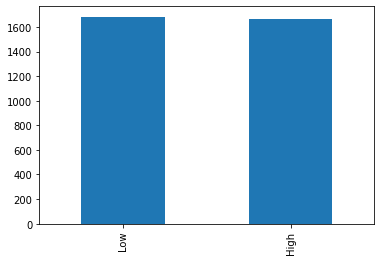

In [20]:
#Alcohol attribute
print(dataFrame['Alcohol_flag'].value_counts())
dataFrame['Alcohol_flag'].value_counts().plot.bar()

Low     1726
High    1619
Name: Sugar_flag, dtype: int64


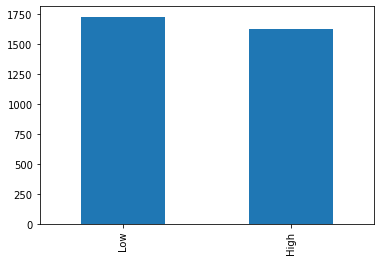

In [21]:
#Sugar attribute
print(dataFrame['Sugar_flag'].value_counts())
dataFrame['Sugar_flag'].value_counts().plot.bar()

White    2260
Red      1085
Name: Type, dtype: int64


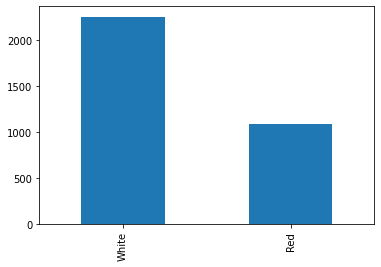

In [22]:
#Type (target)
print(dataFrame['Type'].value_counts())
dataFrame['Type'].value_counts().plot.bar()

All of the attributes are well distributed except type which is skewed towards white wines.

##Encode Dataset

The dataset will be encoded using the scikit-learn ordinal encoder. 

In [24]:
from sklearn.preprocessing import OrdinalEncoder
myencoder = OrdinalEncoder()
encoded_arr = myencoder.fit_transform(dataFrame)
dataFrame_encoded = pd.DataFrame(encoded_arr, columns=dataFrame.columns, index=dataFrame.index)
dataFrame_encoded.head()

,Type,Alcohol_flag,Sugar_flag
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,1.0


For Type, 0 = Red, 1 = White

For Alcohol, 0 = High, 1 = Low

For Sugar, 0 = High, 1 = Low

##Cross-Tabulations

Cross tabulations will be made for Type and Alcohol flag, as well as Type and Sugar_Flag.

Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084


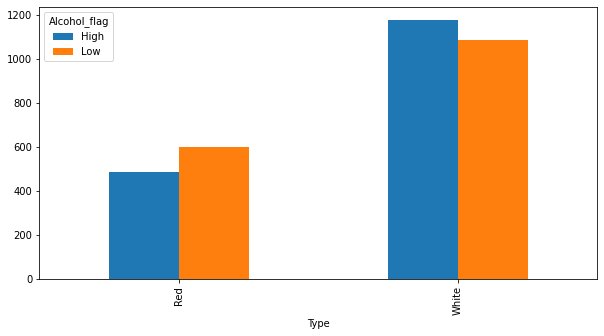

In [23]:
crossTab = pd.crosstab(dataFrame['Type'], dataFrame['Alcohol_flag'])
print(crossTab)
pythonBarPlot = crossTab.plot.bar(figsize=(10,5))

Reds with high alcohol = 485

Reds with low alcohol = 600

Whites with high alcohol = 1176

Whites with low alcohol = 1084

Probability of Red w/high alcohol = 485/1085 = 44.7%

Probability of Red w/low alcohol = 600/1085 = 55.3%

Probability of White w/high alcohol = 1176/2260 = 52%

Probability of White w/low alcohol = 1084/2260 = 48%

Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


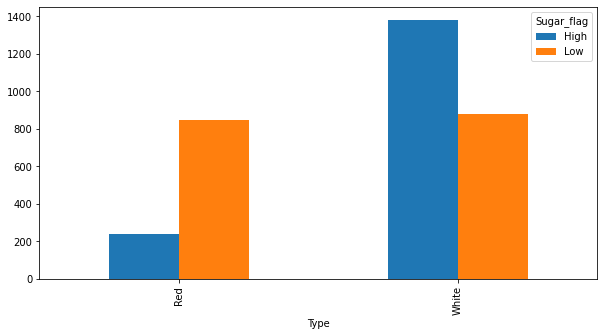

In [25]:
crossTab = pd.crosstab(dataFrame['Type'], dataFrame['Sugar_flag'])
print(crossTab)
pythonBarPlot = crossTab.plot.bar(figsize=(10,5))

Reds with high sugar = 237

Reds with low sugar = 848

Whites with high sugar = 1382

Whites with low sugar = 878

Probability of red w/high sugar = 237/1085 = 21.8%

Probability of red w/low sugar = 848/1085 = 78.2%

Probability of white w/high sugar = 1382/2260 = 61.2%

Probability of white w/low sugar = 878/2260 = 38.8%

##Calculate Probabilties

7)

**a)**

Prior probability of red = number of reds/number of total wines = 1085/3345 = 32.4%

Prior probability of white = number of whites/number of total wines = 2260/3345 = 67.6%

****

**b)**

Probability of high sugar content = total number of highs/total number of rows = 1619/3345 = 48.4%

Probability of low sugar content = total number of lows/total number of rows = 1726/3345 = 51.2%

****

**c)**

Probability of high alcohol content = total number of highs/total number of rows = 1661/3345 = 49.7%

Probability of low alcohol content = total number of lows/total number of rows = 1684/3345 = 50.3%

****

**d)**

p(Alcohol_flag = High ∣ Type = Red) = p(Red|High)*p(High)/p(Red) 

p(Red|High) = .447

p(High) = .497

p(Red) = .324

= (.447 * .497)/.324 = 0.686 = 68.6%

****

**e)**

p(Sugar_Flag = Low | Type = Red) = p(Red|Low)*p(Low)/p(Red)

p(Red|Low) = .782

p(Low) = .512

p(Red) = .324

= (.782 * .512)/.324 = 1.23 = 123% (not sure if I made a mistake, this number should most likley not be above 100)


The results above show the probabilities displayed through the cross tabulations and the attribute distributions displayed earlier in this report. The results of the first conditional probability show that there is a 68.6% percent chance that if the alcohol content is high then the type is red. The second conditional probability is where I am slightly confused, the results are over 100% which seems out of range. It does make sense though that the conditional probability for: if the sugar content is low then the type is red, would be high since the results of the cross tabulation show that over 70% of the red wine samples in this dataset have low sugar content. 

##Naive Bayes Models

Naive Bayes models from scikit-learn will be used to further analyze this dataset. Multiple models will be trained for multiple train/test splits such as 80/20, 75/25, 70/30..., these models will then be compared based on their training and testing scores in hope to find the best train/test split.

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x = dataFrame_encoded.drop(columns=['Type'], axis = 1)
y = dataFrame_encoded['Type']

NBmodel = GaussianNB()
#70/30 split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)
NBmodel.fit(x_Train, y_Train)
model1_trainScore = NBmodel.score(x_Train, y_Train)
model1_testScore = NBmodel.score(x_Test, y_Test)

#75/25 split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)
NBmodel.fit(x_Train, y_Train)
model2_trainScore = NBmodel.score(x_Train, y_Train)
model2_testScore = NBmodel.score(x_Test, y_Test)

#80/20 split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)
NBmodel.fit(x_Train, y_Train)
model3_trainScore = NBmodel.score(x_Train, y_Train)
model3_testScore = NBmodel.score(x_Test, y_Test)

#60/40
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)
NBmodel.fit(x_Train, y_Train)
model4_trainScore = NBmodel.score(x_Train, y_Train)
model4_testScore = NBmodel.score(x_Test, y_Test)

#50/50 split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.40, stratify=y)
NBmodel.fit(x_Train, y_Train)
model5_trainScore = NBmodel.score(x_Train, y_Train)
model5_testScore = NBmodel.score(x_Test, y_Test)

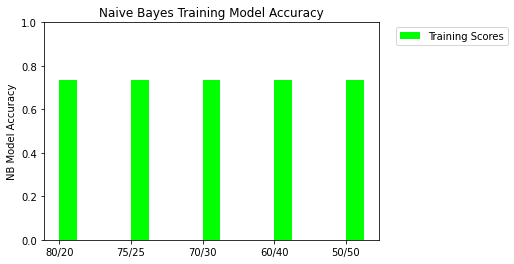

In [35]:
#Graph Data
labels = ['80/20', '75/25', '70/30', '60/40', '50/50']
values = [model3_trainScore, model2_trainScore, model1_trainScore, model4_trainScore, model5_trainScore]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, values, width, label='Training Scores', color='lime')

ax.set_ylabel('NB Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('Naive Bayes Training Model Accuracy')
plt.show()

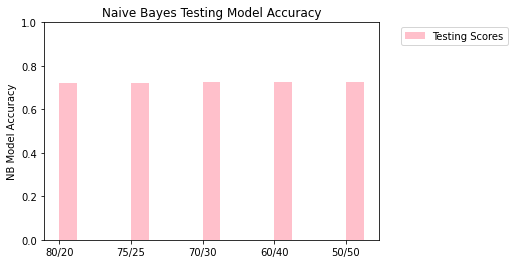

In [34]:
test_values = [model3_testScore, model2_testScore, model1_testScore, model4_testScore, model5_testScore]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, values, width, label='Testing Scores', color='pink')

ax.set_ylabel('NB Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('Naive Bayes Testing Model Accuracy')
plt.show()

##Summary

Naive Bayes models were trained using the wine dataset to see if a predicition can wine type (white or red) can be made based on alcohol and sugar content. Multiple models were trained using different train/test split sizes, the sizes are as follows, 80/20, 75/25, 70/30, 60/40, and 50/50. The purpose of doing this is to find the split size that will yield the highest model accuracy scores. 

The results show that the train and test scores are about the same for each train/test split tested in this report. The average results of the model are decent with training accuracy scores around 73.5% and testing accuracy scores around 72%. While the differences between the train/test splits are very small, if forced to choose one it seems that the 70/30 split for this dataset is the best choice. 